In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu Feb 25 02:59:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 37kB/s 


In [4]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [5]:
# import the libraries as shown below
#from keras import layers,models
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications.nasnet import NASNetLarge
#from tensorflow.keras.applications.nasnet import preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import pandas as pd
import os

In [6]:
df=pd.read_csv('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/train.csv')
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [7]:
df['Class'].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


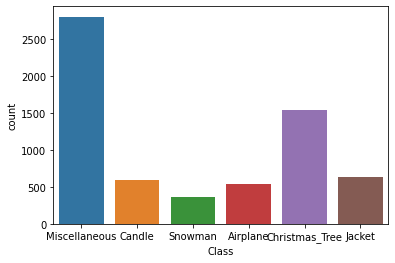

In [8]:
sns.countplot(df['Class'])


In [9]:
# re-size all the images to this
IMAGE_SIZE = [299, 299]

train_path = '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train'
valid_path = '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/valid'

In [10]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

base_model = Xception(input_shape=(299, 299, 3), weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 2s 0us/step


In [11]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/*')

In [13]:
folders

['/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Candle',
 '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Jacket',
 '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Airplane',
 '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Snowman',
 '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Christmas_Tree',
 '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train/Miscellaneous']

In [14]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [15]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 22,043,438
Trainable params: 1,181,958
Non-trainable params: 20,861,480
____________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/new_train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5508 images belonging to 6 classes.


In [ ]:
training_set.class_indices

In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/valid',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 969 images belonging to 6 classes.


In [20]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
173/173 [==============================] - 3481s 20s/step - loss: 0.7625 - accuracy: 0.7337 - val_loss: 0.3083 - val_accuracy: 0.8803
Epoch 2/15
173/173 [==============================] - 1343s 8s/step - loss: 0.3777 - accuracy: 0.8646 - val_loss: 0.2886 - val_accuracy: 0.8958
Epoch 3/15
173/173 [==============================] - 1335s 8s/step - loss: 0.3062 - accuracy: 0.8899 - val_loss: 0.2716 - val_accuracy: 0.9009
Epoch 4/15
173/173 [==============================] - 1310s 8s/step - loss: 0.2674 - accuracy: 0.9028 - val_loss: 0.2629 - val_accuracy: 0.9082
Epoch 5/15
173/173 [==============================] - 1306s 8s/step - loss: 0.2546 - accuracy: 0.9102 - val_loss: 0.2703 - val_accuracy: 0.9082
Epoch 6/15
173/173 [==============================] - 1289s 7s/step - loss: 0.2275 - accuracy: 0.9150 - val_loss: 0.2701 - val_accuracy: 0.9040
Epoch 7/15
173/173 [==============================] - 1300s 8s/step - loss: 0.2213 - accuracy: 0.9164 - val_loss: 0.2947 - val_accuracy

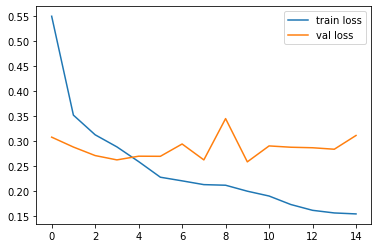

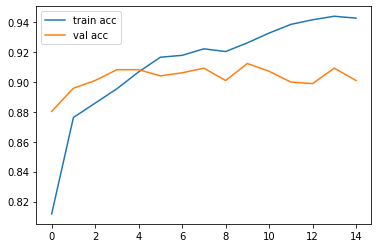

<Figure size 432x288 with 0 Axes>

In [21]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
model.save('modelF_dropoutxception.h5')

In [23]:
classes = training_set.class_indices

In [27]:
classes

{'Airplane': 0,
 'Candle': 1,
 'Christmas_Tree': 2,
 'Jacket': 3,
 'Miscellaneous': 4,
 'Snowman': 5}

In [ ]:
classes = dict((v,k) for k,v in classes.items())
classes = [classes[k] for k in classes]

In [ ]:
Image = []
prediction = []


for i, file in enumerate(os.listdir('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/test/Images/')):
    Image.append(file)
    file = '/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/test/Images/' + file

    img = image.load_img(file, target_size=(299,299,3)) 
    img = image.img_to_array(img)
    img = img/255
    pred = model.predict(img.reshape(1,299,299,3))

    prediction.append(classes[np.argmax(pred[0])])

In [ ]:
# submission file creation
data=pd.DataFrame((zip(Image, prediction)),columns=['Image','Class'])
data.head()

In [ ]:
data.to_csv('/content/drive/MyDrive/DEEP LEARNING/DATASET2/HOLIDAYDATA/dropoutxcepcep_submission.csv',index=False)